In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Now that we’ve learned about probability distributions, we can move on to the core concepts of Bayesian analysis: **prior**, **likelihood**, and **posterior**.

In Bayesian thinking, we assume that we have some knowledge or some belief about the parameters. This belief could come from expert knowledge, past experience, or research. We represent this belief to parameters as a probability distribution and call it the **prior**.

Then, we collect and observe the data and describe it using a probability distribution and call it the **likelihood**.

Then we update prior with likelihood and call it **posterior**.

> **Prior:** The prior is what we believe about the parameters before seeing any data. For example, if we assume a coin is fair, we might say there is a 50% chance of heads. That’s our prior belief. Another example, we might know from past experience that a factory's defect rate is usually around 5%.

> **Likelihood:** The likelihood tells us how likely our observed data is, given different values of the parameter we’re trying to estimate. It reflects what our observed data tells. 

> **Posterior:** The posterior is our updated belief about the parameters after we have seen the data.

As we collect more data, the likelihood becomes more dominant, and the posterior becomes more and more shaped by the data — but it always starts from the prior.

So in summary:
- **Prior** = What we believe before seeing the data  
- **Likelihood** = What the data says  
- **Posterior** = What we believe after seeing the data

It will be more clear in the upcoming examples.

Main formula is:

$$
P(\theta \mid D) = \frac{P(D \mid \theta) \cdot P(\theta)}{P(D)}
$$

But no need to deep knowledge math details because probably no need for PyMC.

Knowing this would be enough:  
> Posterior = Prior × Likelihood

**Important**: *prior, likelihood, and posterior* are are all *probability distributions*, not single fixed values.


# The coin-flipping problem

Classical coin-flip example.

**Prior**

We have a coin, but we don't know if the coin is fair or unfair, but the probability of getting heads (theta) is between 0 and 1.

Because of this, we can use the **Beta distribution**, which is defined between 0 and 1.  
(Although the result of a coin flip is either 0 or 1 a discrete outcome, but what we want to model is the *probability* of getting heads, which is a continuous value between 0 and 1. So, we choose a continuous distribution.)

We can believe the coin is fair because, I have never seen an unfair coin before in real life. So we expect 5 heads and 5 tails in 10 flips. This belief forms the basis of our prior.

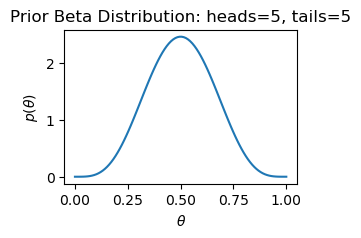

In [2]:
# x axis as 100 number from 0 to 1
x = np.linspace(0, 1, 100)

a_prior = 5 # number of heads I expect
b_prior = 5 # number of tails I expect


prior = stats.beta.pdf(x, a_prior, b_prior)


# Plot Settings
plt.figure(figsize=(3, 2))
plt.plot(x, prior)

plt.title(f'Prior Beta Distribution: heads={a_prior}, tails={b_prior}')
plt.xlabel('$\\theta$')
plt.ylabel('$p(\\theta)$')
plt.show()

**Likelihood**

After defined our prior belief about the coin’s fairness, we will look at the data we actually observe.  
We flipped the coin 10 times, and we observe 7 heads and 3 tails.

Since each coin flip is independent and has two possible outcomes, the likelihood is suggested to be modeled with a **Binomial distribution**. 

We usually use the Beta distribution with Binomial (or Bernoulli) distributions because Beta is the conjugate prior of the Binomial. Do I need to dive into this? I don't know.

https://en.wikipedia.org/wiki/Conjugate_prior



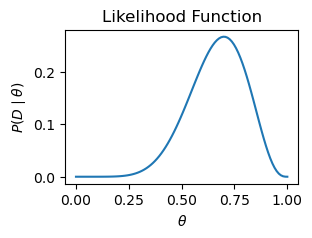

In [3]:
flip = 10 # total flips
head = 7 # heads observed


likelihood = stats.binom.pmf(head, flip, x)


# Plot Settings
plt.figure(figsize=(3, 2))
plt.plot(x, likelihood)

plt.title('Likelihood Function')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(D \mid \theta)$')
plt.show()

From the plot, values of theta closer to 0.7 (7 heads in 10 flips).

So the likelihood function "leans toward" those values — but it does not yet combine with our prior. We will do that in the **posterior**.


**Posterior**

We started with a Beta(5, 5) prior (reflecting our belief that the coin is probably fair).  
Then we observed 7 heads and 3 tails in 10 flips.

Since we already have both the prior and likelihood as probability values across the same range of \(\theta\) (from 0 to 1), we can multiply them point by point:
> Posterior = Prior × Likelihood

This product gives an *unnormalized posterior*. We can then normalize it so that the area under the curve sums to 1.


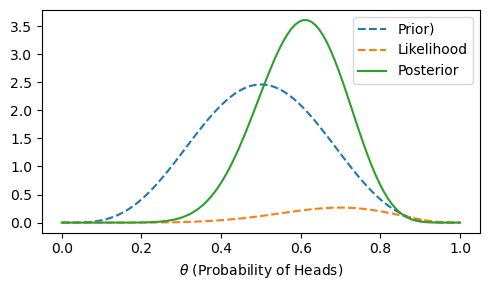

In [4]:
# Unnormalized posterior = prior × likelihood
unnormalized_posterior = prior * likelihood

# Normalize it so it sums to 1
posterior = unnormalized_posterior / np.trapezoid(unnormalized_posterior, x)


# Plot Settings
plt.figure(figsize=(5, 3))
plt.plot(x, prior, label='Prior)', linestyle='--')
plt.plot(x, likelihood, label='Likelihood', linestyle='--')
plt.plot(x, posterior, label='Posterior')

plt.xlabel(r'$\theta$ (Probability of Heads)')
plt.legend()
plt.tight_layout()
plt.show()

From the plot:

- The **prior** was symmetric around 0.5 (we believed the coin was fair).
- The **likelihood** peaks around 0.7, because we observed more heads than tails.
- The **posterior** is a compromise: it shifts toward 0.7, but still reflects our initial belief.

As we collect more data, the likelihood will have more influence, and the posterior will be shaped more strongly by the observed results.  


If continue flipping the coin and get new observations, the **posterior** from the previous step becomes the new **prior** for the next update.

This process is called **Bayesian updating**.


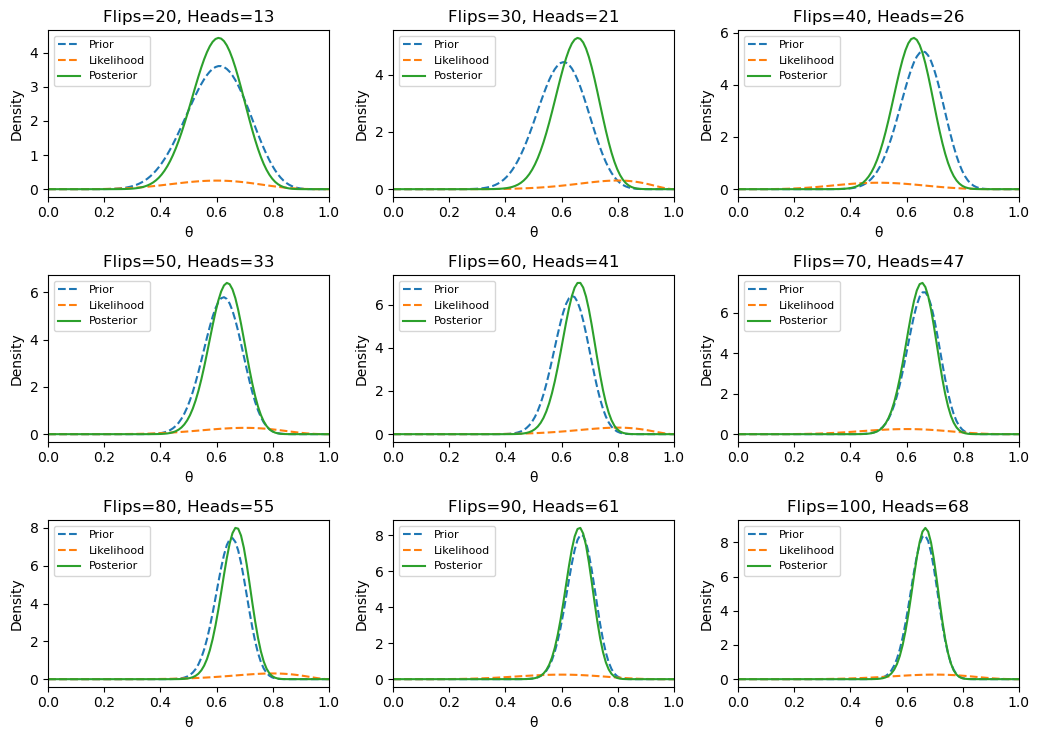

In [5]:
# First 10 flips
total_flips = 10
total_heads = 7

# New flips
flips = [10, 10, 10, 10, 10, 10, 10, 10, 10]
heads = [6, 8, 5, 7, 8, 6, 8, 6, 7]


# Plot settings
num_plots = len(flips)
cols = 3
rows = (num_plots + cols - 1) // cols
plt.figure(figsize=(cols * 3.5, rows * 2.5))


for i, (flip, head) in enumerate(zip(flips, heads)):

    total_flips += flip
    total_heads += head

    # Prior
    prior = posterior # Use the previous posterior as the new prior

    # Likelihood
    likelihood = stats.binom.pmf(head, flip, x) # Calculate likelihood only based on the new data

    # Posterior
    unnormalized_posterior = prior * likelihood
    posterior = unnormalized_posterior / np.trapezoid(unnormalized_posterior, x)


    # Plot 
    plt.subplot(rows, cols, i+1)

    plt.plot(x, prior, label='Prior', linestyle='--')
    plt.plot(x, likelihood, label='Likelihood', linestyle='--')
    plt.plot(x, posterior, label='Posterior')

    plt.title(f'Flips={total_flips}, Heads={total_heads}')
    plt.xlabel('θ')
    plt.ylabel('Density')
    plt.xlim(0, 1)
    plt.legend(fontsize=8)
    plt.tight_layout()

plt.show()


See how the green line (posterior) changes over the new flips. 

**Posterior Predictive Check**

We can check whether predictions generated from posterior look similar to observed data.

> **Posterior predictive check:** Generate new data from the posterior distribution and see if it matches the real observations.

In our case, we flipped a coin 100 times and saw 68 heads. If we simulate 100 flips data using the posterior probability, can we get a similar result to experiment?

To test this,
1. Our posterior distribution has lots of values from 0 to 1 but it is aggregated around θ = 0.68. Create many sample θ from posterior distribution.
2. For each sampled θ, we simulate 100 coin flips.
3. Then, we look at how many heads we get in each simulation.



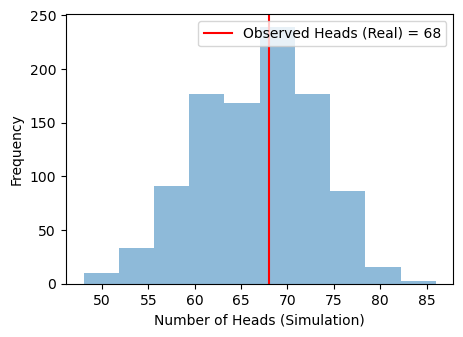

In [6]:
# Number of simulation we want to run
number_of_simulation = 1000

# Number of coin flips in each simulation
number_of_flips = 100


# Randomly pick 1000 theta values from posterior distribution. Put them to a list.
# Each theta represents a possible probability of getting heads ex: [0.6969697 , 0.64646465, 0.58585859, ...]
theta_simulation = np.random.choice(x, size=number_of_simulation, p=posterior/posterior.sum() )


# For each theta in theta_simulation, flips 100 coin and count the number of heads
heads_simulation = np.random.binomial(n=number_of_flips, p=theta_simulation)


# Plot
plt.figure(figsize=(5,3.5))
plt.hist(heads_simulation, bins=10, alpha=0.5)

plt.axvline(total_heads, color='red', label=f'Observed Heads (Real) = {total_heads}')
plt.xlabel('Number of Heads (Simulation)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Linear Regression

Now we will apply bayesian on continuous data by performing linear regression using mtcars dataset to build relation between "*Car Weigth*" and "*Miles per gallon*" car can go. (This section is a bit theoritically harder but it will be easier after we start to use PyMC) 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


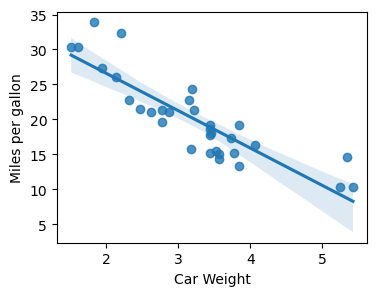

In [7]:
import statsmodels.api as sm
import seaborn as sns

# Loading dataset
mtcars = sm.datasets.get_rdataset("mtcars").data
display(mtcars.head())

# Alternative regressions
# mpg ~ wt
# mpg ~ wt + hp
# mpg ~ qsec

# Plot
plt.figure(figsize=(4, 3))
sns.regplot(mtcars, x='wt', y='mpg')

plt.xlabel('Car Weight')
plt.ylabel('Miles per gallon')
plt.show()

From the graph above, we can see a negative relationship between a car’s weight and the number of miles per gallon it can go.

We can model this relationship using a simple linear regression:

> Y = A + BX + ε

- Y is the dependent variable (miles per gallon)
- X is the independent variable (car weight)
- A is the intercept
- B is the slope
- ε is the error term



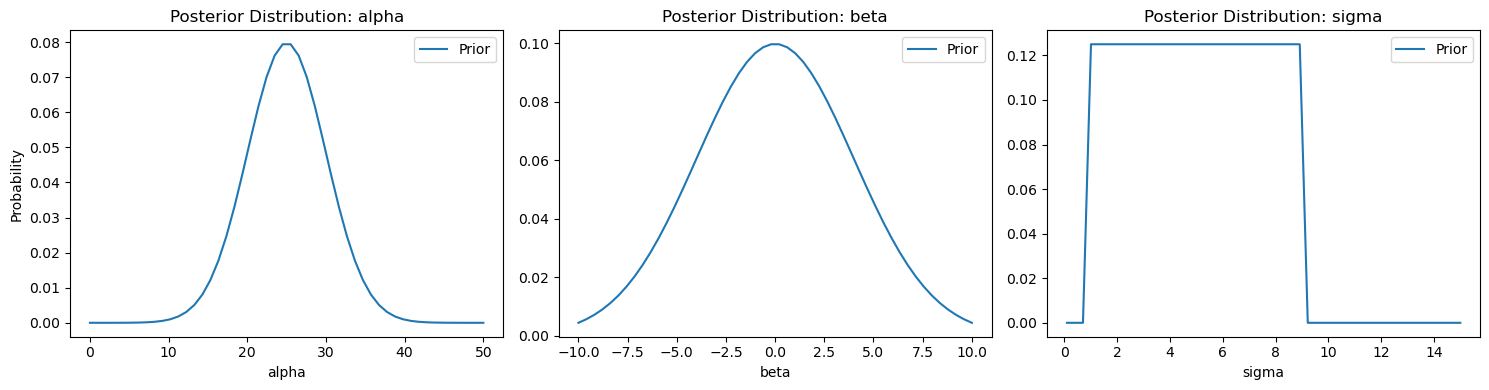

In [8]:
# Creating x axis grid that will align with priors
# keep the num small, otherwise it will be computationally expensive
alpha_grid = np.linspace(start=0, stop=50, num=50)
beta_grid = np.linspace(start=-10, stop=10, num=50)
sigma_grid = np.linspace(start=0.1, stop=15, num=50)

# Prior
alpha_prior = stats.norm.pdf(alpha_grid, 25, 5) # Normal(25, 5)
beta_prior =  stats.norm.pdf(beta_grid, 0, 4) # Normal(0, 4)
sigma_prior = stats.uniform.pdf(sigma_grid, 1, 8) # Uniform(1, 8)


# Plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(alpha_grid, alpha_prior, label='Prior')
plt.title(r'Posterior Distribution: alpha')
plt.xlabel(r'alpha')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(beta_grid, beta_prior, label='Prior')
plt.title(r'Posterior Distribution: beta')
plt.xlabel(r'beta')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(sigma_grid, sigma_prior, label='Prior')
plt.title(r'Posterior Distribution: sigma')
plt.xlabel(r'sigma')
plt.legend()

plt.tight_layout()
plt.show()

Now that we defined our priors, we can compute likelihood and posterior distribution. 

In [9]:
x = mtcars['wt']
y = mtcars['mpg']

# We are creating a empty posterior template
# We will fill it in by calculating the posterior for each combination.
unnormalized_posterior = np.zeros((len(alpha_grid), len(beta_grid), len(sigma_grid)))

# Loop for every possible values of alpha, beta, and sigma
for i, alpha in enumerate(alpha_grid):
    for j, beta in enumerate(beta_grid):
        for k, sigma in enumerate(sigma_grid):

            # --- Prior ---
            # Calculating the joint prior probability by multiplying the individual priors for alpha, beta, and sigma.
            prior_ijk = alpha_prior[i] * beta_prior[j] * sigma_prior[k] # joint prior probability

            # calculating the expected mpg (y_pred) for each alpha and beta values
            mu = alpha + beta*x

            # --- Likelihood ---
            # Assuming the data follows a Normal distribution with mean = mu and std = sigma.
            # We are computing the probability of observing the actual y (mpg) values under this distribution,
            # and then multiplying these calculated probabilities to get the total likelihood for this parameter set.
            likelihood_ijk = np.prod(stats.norm.pdf(y, mu, sigma))

            # --- Posterior ---
            unnormalized_posterior[i, j, k] = prior_ijk * likelihood_ijk

# Normalizing to ensure that the posterior sums to 1.
posterior = unnormalized_posterior / np.sum(unnormalized_posterior)

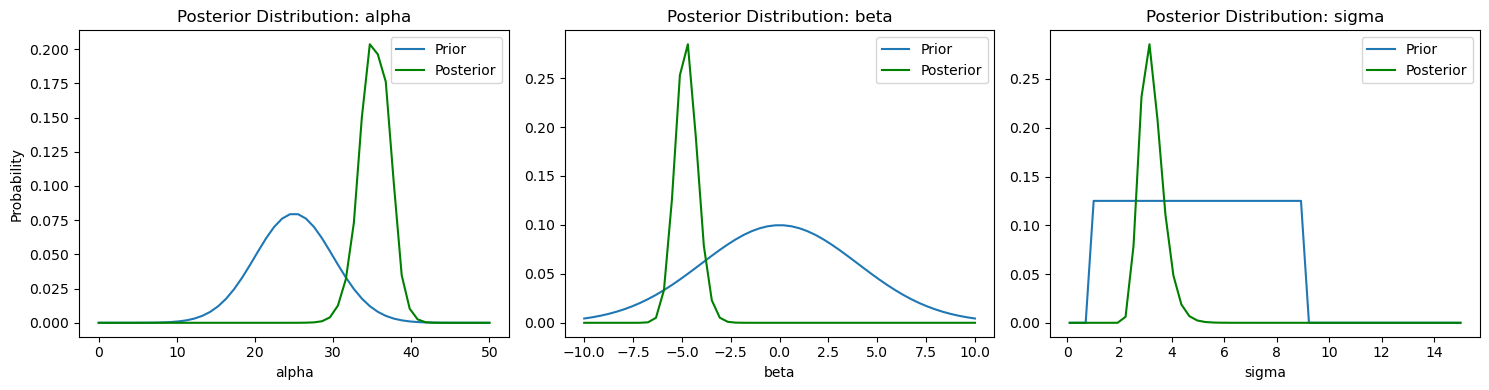

In [10]:
# Posterior distribution for alpha
alpha_posterior = np.sum(posterior, axis=(1, 2))
alpha_posterior /= np.sum(alpha_posterior) # Normalizing

# Posterior distribution for beta
beta_posterior = np.sum(posterior, axis=(0, 2))
beta_posterior /= np.sum(beta_posterior) # Normalizing

# Posterior distribution for sigma
sigma_posterior = np.sum(posterior, axis=(0, 1))
sigma_posterior /= np.sum(sigma_posterior) # Normalizing


# Plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(alpha_grid, alpha_prior, label='Prior')
plt.plot(alpha_grid, alpha_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: alpha')
plt.xlabel(r'alpha')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(beta_grid, beta_prior, label='Prior')
plt.plot(beta_grid, beta_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: beta')
plt.xlabel(r'beta')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(sigma_grid, sigma_prior, label='Prior')
plt.plot(sigma_grid, sigma_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: sigma')
plt.xlabel(r'sigma')
plt.legend()

plt.tight_layout()
plt.show()

In theory, the code above should work. However, sometimes it may leads to **numerical underflow** because of computer computation. (In this example we didn't face with this error.)   
When we multiply many small probabilities together using np.prod(), the result can become so tiny that computer rounds to zero, leaving us a posterior with full of zeros. This is a common issue in Bayesian computations with continuous data.  

A standard solution for that, instead of multiplying probabilities, taking their logarithms and summing them. This approach keeps the numbers in a manageable range and avoids underflow.

> $\log(p_1 \cdot p_2 \cdot \dots \cdot p_n) = \log(p_1) + \log(p_2) + \dots + \log(p_n)$



In [11]:
# Log Prior
log_alpha_prior = stats.norm.logpdf(alpha_grid, 25, 5) # Normal(25, 5)
log_beta_prior =  stats.norm.logpdf(beta_grid, 0, 4) # Normal(0, 4)
log_sigma_prior = stats.uniform.logpdf(sigma_grid, 1, 8) # Uniform(1, 8)

In [12]:
x = mtcars['wt']
y = mtcars['mpg']

# We are creating a empty posterior template
# We will fill it in by calculating the posterior for each combination.
unnormalized_log_posterior = np.zeros((len(alpha_grid), len(beta_grid), len(sigma_grid)))

# Loop for every possible values of alpha, beta, and sigma
for i, alpha in enumerate(alpha_grid):
    for j, beta in enumerate(beta_grid):
        for k, sigma in enumerate(sigma_grid):
            
            # --- Prior ---
            # Instead of multiplying, we are summing because of log
            log_prior_ijk = log_alpha_prior[i] + log_beta_prior[j] + log_sigma_prior[k]

            # calculating the expected mpg (y_pred) for each alpha and beta values
            mu = alpha + beta*x

            # --- Likelihood ---
            # # Instead of multiplying, we are using np.sum()
            log_likelihood_ijk = np.sum(stats.norm.logpdf(y, mu, sigma))
            
            # --- Posterior ---
            unnormalized_log_posterior[i, j, k] = log_prior_ijk + log_likelihood_ijk


# we are doing like this to prevent infinity/zero error
relative_log_posterior = unnormalized_log_posterior - np.max(unnormalized_log_posterior) # basically doing posterior/max(posterior) 

# then we convert it to normal values
posterior = np.exp(relative_log_posterior)

# Normalizing to ensure that the posterior sums to 1.
posterior = posterior/np.sum(posterior)

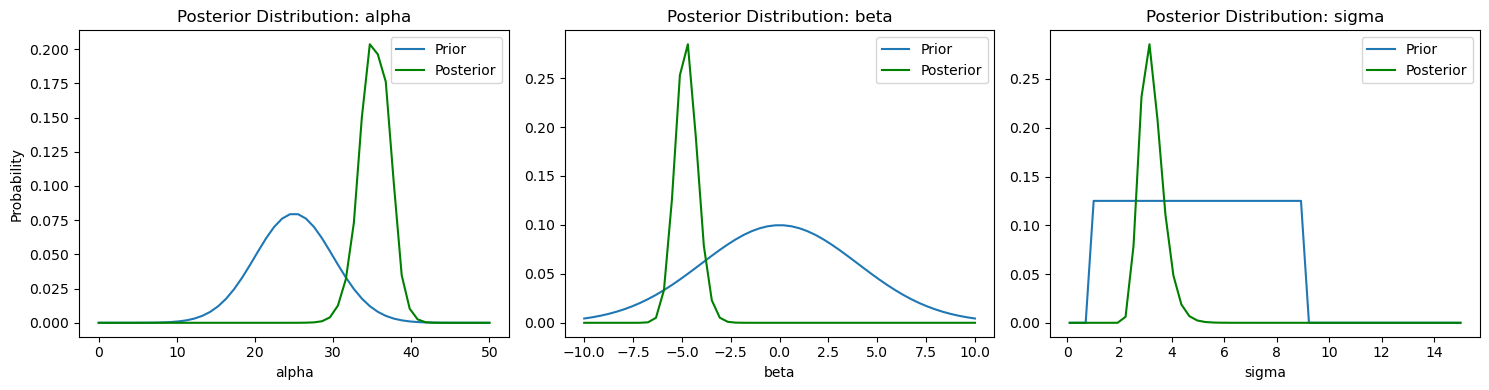

In [13]:
# Posterior distribution for alpha
alpha_posterior = np.sum(posterior, axis=(1, 2))
alpha_posterior /= np.sum(alpha_posterior) # Normalizing

# Posterior distribution for beta
beta_posterior = np.sum(posterior, axis=(0, 2))
beta_posterior /= np.sum(beta_posterior) # Normalizing

# Posterior distribution for sigma
sigma_posterior = np.sum(posterior, axis=(0, 1))
sigma_posterior /= np.sum(sigma_posterior) # Normalizing


# Plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(alpha_grid, alpha_prior, label='Prior')
plt.plot(alpha_grid, alpha_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: alpha')
plt.xlabel(r'alpha')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(beta_grid, beta_prior, label='Prior')
plt.plot(beta_grid, beta_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: beta')
plt.xlabel(r'beta')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(sigma_grid, sigma_prior, label='Prior')
plt.plot(sigma_grid, sigma_posterior, label='Posterior', color='green')
plt.title(r'Posterior Distribution: sigma')
plt.xlabel(r'sigma')
plt.legend()

plt.tight_layout()
plt.show()